**Classification of the CIFAR-10 dataset using Keras**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 15s 0us/step
Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.8678 - accuracy: 0.3205 - val_loss: 1.7266 - val_accuracy: 0.3796
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6853 - accuracy: 0.3948 - val_loss: 1.6469 - val_accuracy: 0.4113
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6107 - accuracy: 0.4229 - val_loss: 1.5798 - val_accuracy: 0.4336
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5490 - accuracy: 0.4428 - val_loss: 1.5665 - val_accuracy: 0.4476
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5015 - accuracy: 0.4602 - val_loss: 1.5113 - val_accuracy: 0.4629
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4670 - accuracy: 0.4725 - val_loss: 1.5153 - val_accuracy: 0.4641
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step

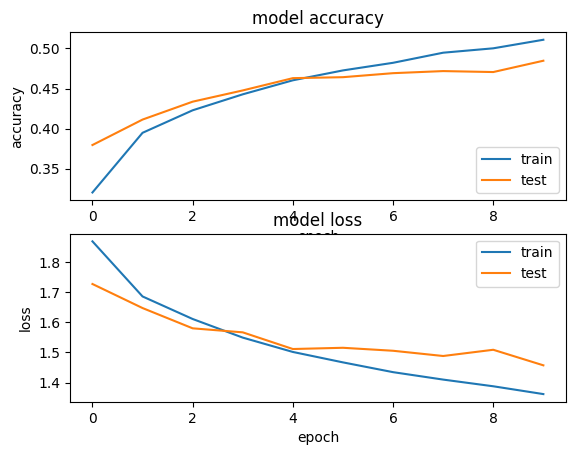

In [1]:
import matplotlib.pyplot as plt # plotting library
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import utils


# load dataset
(X_train, y_train), (X_test, y_test) =  cifar10.load_data()
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
n_classes = 10

# convert to one-hot vector
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)


#  resize and normalize
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32')  /255

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(1000, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
#sgd = tf.keras.optimizers.SGD(lr=1e-1)
adam = tf.keras.optimizers.Adam(lr=1e-1)
model.compile(loss='categorical_crossentropy',optimizer=adam ,metrics=['accuracy'])

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,epochs=10,validation_data=(X_test, Y_test))

# plotting
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')